# Conociendo nuestros datos de pingüinos. 🗺🧭🐧

## Importar librerías

In [2]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import palmerpenguins
import pandas as pd
import scipy.stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss

## Establecer apariencia general de los gráficos

In [3]:
%matplotlib inline
sns.set_style(style='whitegrid')
sns.set_context(context='notebook')
plt.rcParams['figure.figsize'] = (11, 9.4)

penguin_color = {
    'Adelie': '#ff6602ff',
    'Gentoo': '#0f7175ff',
    'Chinstrap': '#c65dc9ff'
}

## Cargar los datos

### Utilizando el paquete `palmerpenguins`

#### Datos crudos

In [5]:
path = ('./Datos/penguins.csv')
df = pd.read_csv(path)

# Colecta y validación de datos

## ¿Qué tipo de dato son las variables del conjunto de datos?

In [4]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

Hay variables categoricas nominales y numericas discretas y continuas.

## ¿Cuántas variables de cada tipo de dato tenemos en el conjunto de datos?

In [5]:
df.dtypes.value_counts()

float64    4
object     3
int64      1
dtype: int64

Variables categoricas nominales: 3

Variables numericas continuas: 4

Variables numericas discretas: 1

## ¿Cuántas variables y observaciones tenemos en el conjunto de datos?

In [6]:
df.shape

(344, 8)

En el conjunto de datos tenemos 344 obvservaciones y 8 variables

## ¿Existen valores nulos explícitos en el conjunto de datos?

In [7]:
df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

## De tener observaciones con valores nulos, ¿cuántas tenemos por cada variable?

In [8]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

## ¿Cuántos valores nulos tenemos en total en el conjunto de datos?

In [9]:
df.isnull().sum().sum()

19

## ¿Cuál es la proporción de valores nulos por cada variable?

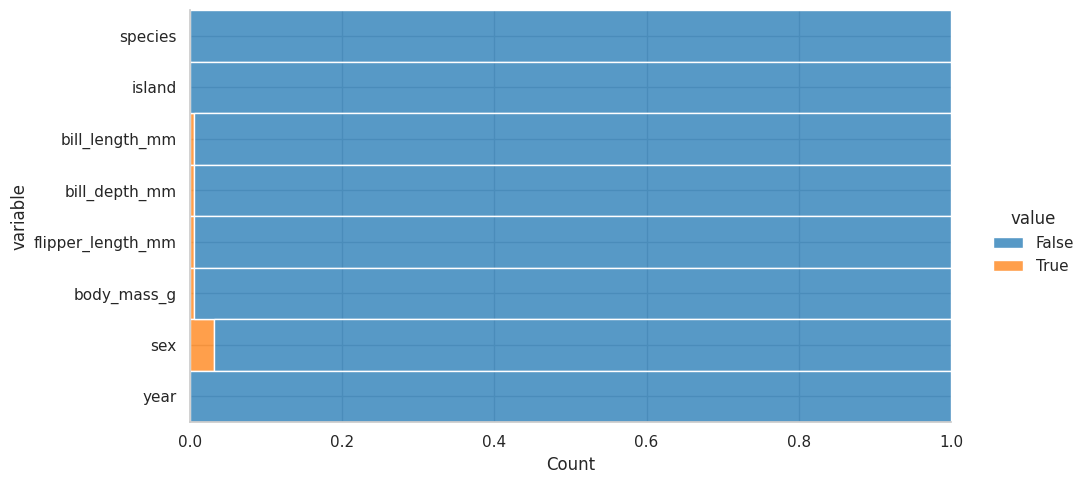

In [10]:
(
    df.isnull().melt().pipe(
        lambda df:(
            sns.displot(
                data = df,
                y = 'variable',
                hue = 'value',
                multiple = 'fill',
                aspect = 2
            )
        )
    )
)

## ¿Cómo podemos visualizar los valores nulos en todo el conjunto de datos?

<AxesSubplot: >

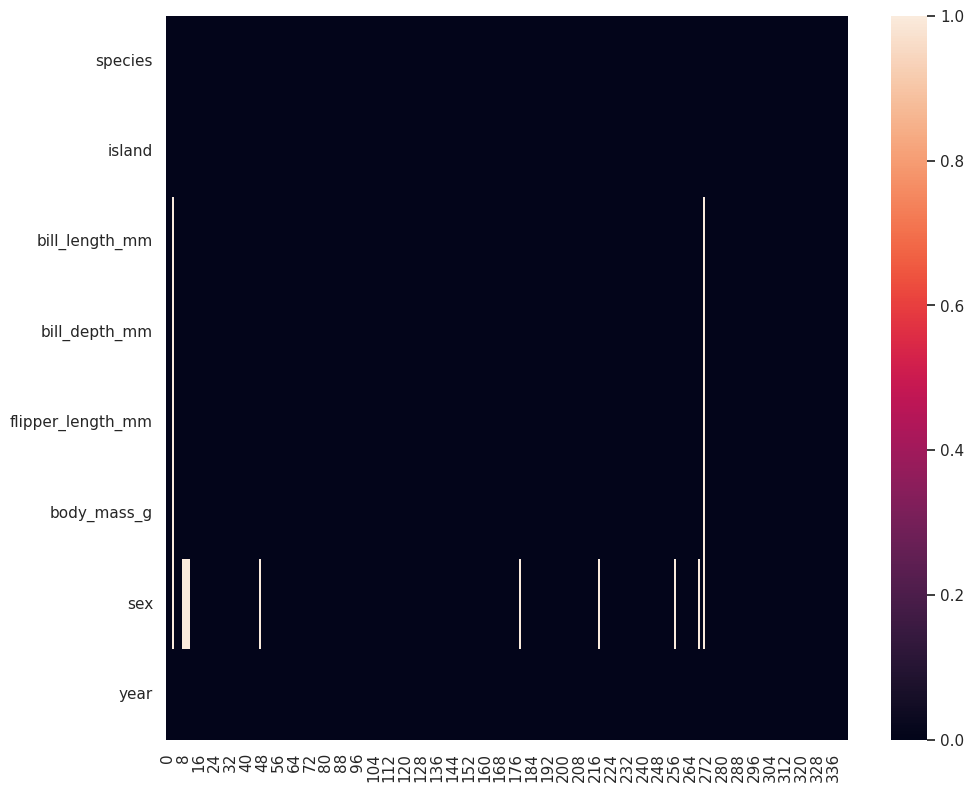

In [11]:
df.isnull().transpose().pipe(
    lambda df: (
        sns.heatmap(
            data = df
        )
    )
)

## ¿Cuántas observaciones perdemos si eliminamos los datos faltantes?

In [ ]:
df.dropna()

# Conteos y proporciones

## Preludio: ¿Qué estadísticos describen el conjunto de datos?

### Todas las variables

In [31]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Solo las numéricas

In [32]:
df.describe(include=[np.number]) 

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


### Solo categóricas - 1

In [33]:
df.describe(include=[np.object]) 

/tmp/ipykernel_8304/80801945.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df.describe(include=[np.object])


,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


### Solo categóricas - 2

In [39]:
(df.astype({
    'species':'category',
    'island':'category',
    'sex' : 'category'
}).describe(include = 'category')
)

,species,island,sex
count,344,344,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,152,168,168


## ¿Cómo visualizar los conteos?

### Pandas

<AxesSubplot: >

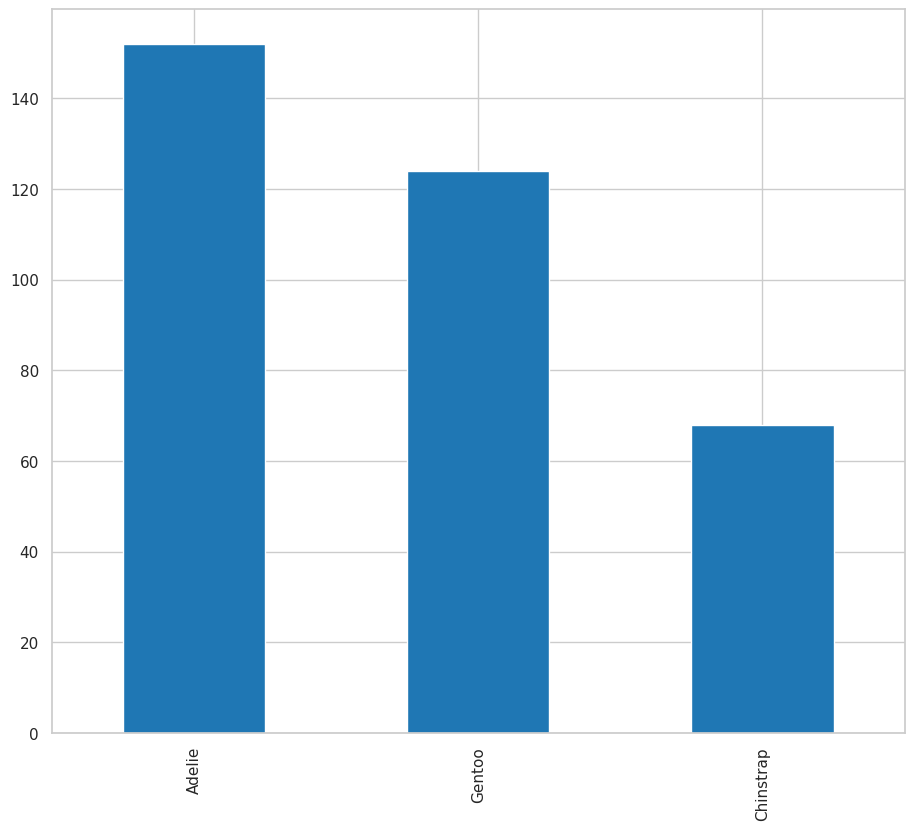

In [12]:
df.species.value_counts().plot(kind = 'bar')

### Seaborn

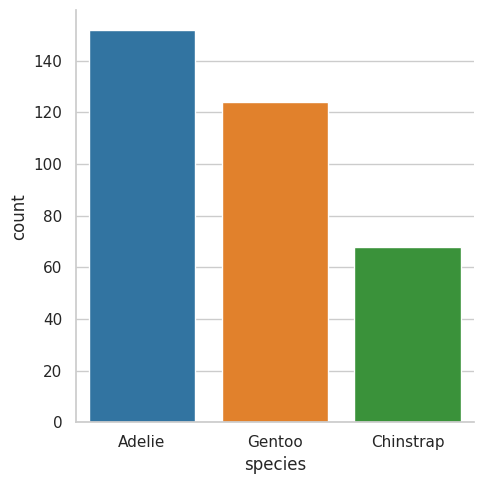

In [13]:
sns.catplot(
    data = df,
    x= 'species',
    kind = 'count'
)

### ¿Cómo visualizar las proporciones?

<AxesSubplot: xlabel='species', ylabel='count'>

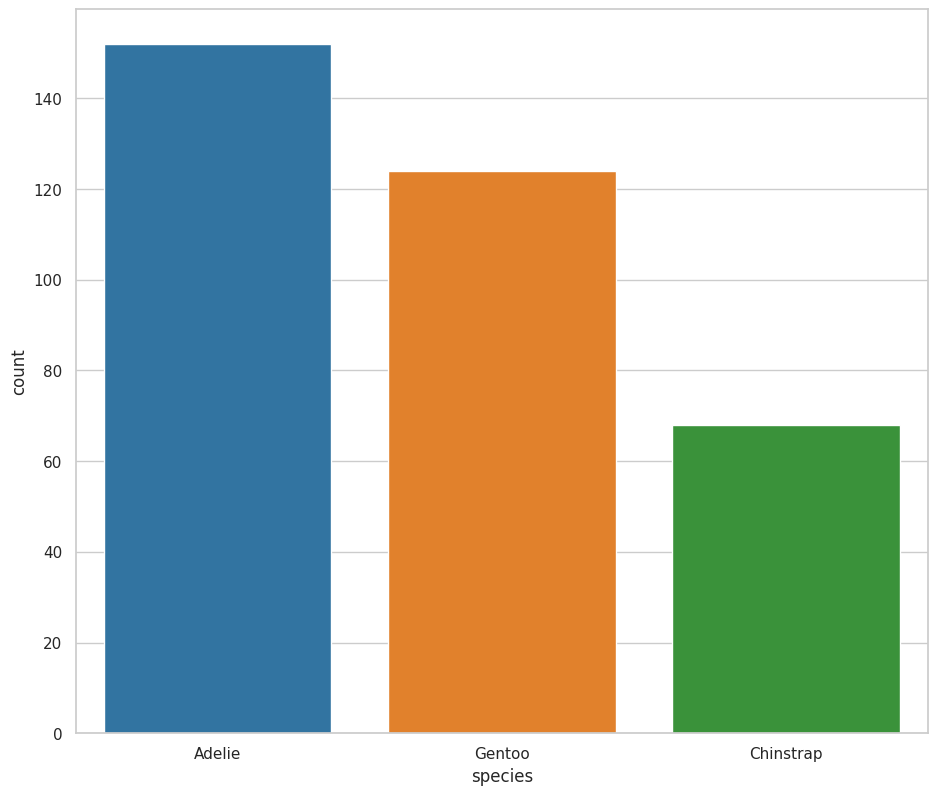

In [16]:
df.value_counts('species', sort = True).reset_index(name='count').pipe(
    lambda df:(
        sns.barplot(
            data = df,
            x = 'species',
            y = 'count'
        )
))

# Medidas de tendencia central

## Media o promedio

In [60]:
df.mean()

/tmp/ipykernel_8304/3698961737.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
year                 2008.029070
dtype: float64

In [61]:
np.mean(df)

/home/cristian/Escritorio/CDIA/Proyectos/Procesamiento de datos/Curso-EDA-Live/pinguinos/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/cristian/Escritorio/CDIA/Proyectos/Procesamiento de datos/Curso-EDA-Live/pinguinos/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
year                 2008.029070
dtype: float64

In [62]:
df.bill_depth_mm.mean()

17.151169590643274

## Mediana

In [63]:
df.median()

/tmp/ipykernel_8304/530051474.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.median()


bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
year                 2008.00
dtype: float64

## Moda

In [64]:
df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


# Medidas de dispersión

## ¿Cuál es el valor máximo de las variables?

In [66]:
df.max()

/tmp/ipykernel_8304/1151452817.py:1: FutureWarning: The default value of numeric_only in DataFrame.max is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.max()


species                 Gentoo
island               Torgersen
bill_length_mm            59.6
bill_depth_mm             21.5
flipper_length_mm        231.0
body_mass_g             6300.0
year                      2009
dtype: object

## ¿Cuál es el valor mínimo de las variables?

In [67]:
df.min()

/tmp/ipykernel_8304/3962516015.py:1: FutureWarning: The default value of numeric_only in DataFrame.min is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.min()


species              Adelie
island               Biscoe
bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
year                   2007
dtype: object

## ¿Cuál es el rango de las variables?

In [75]:
#Se seleccionan las variables numericas para evitar errores de operaciones entre elementos distintos
df.max(numeric_only=True) - df.min(numeric_only = True)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
year                    2.0
dtype: float64

## ¿Cuál es la desviación estándar de las variables?

In [72]:
df.std()

/tmp/ipykernel_8304/3390915376.py:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.std()


bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
year                   0.818356
dtype: float64

## ¿Cuál es el rango intercuartílico?

In [79]:
#Quartil 3
q3 = df.quantile(0.75)

/tmp/ipykernel_8304/852236489.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)


In [80]:
#Quartil 1
q1 = df.quantile(0.25)

/tmp/ipykernel_8304/3169776471.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)


In [81]:
#Rango intercuartilico
rango_intercuartilico = q3 - q1

## ¿Cómo puedo visualizar la distribución de una variable?

### Histograma

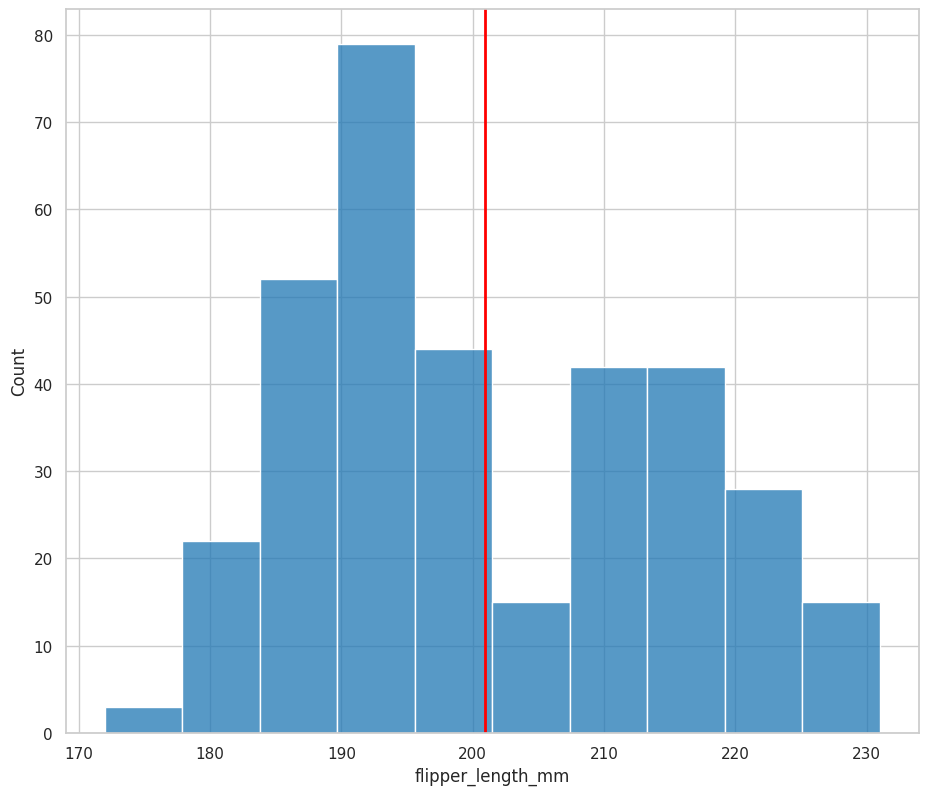

In [85]:
sns.histplot(
    data =  df,
    x = 'flipper_length_mm'
)
plt.axvline(
    x = df.flipper_length_mm.mean(),
    color = 'red',
    linewidth = 2
)

### Diagrama de caja / boxplot

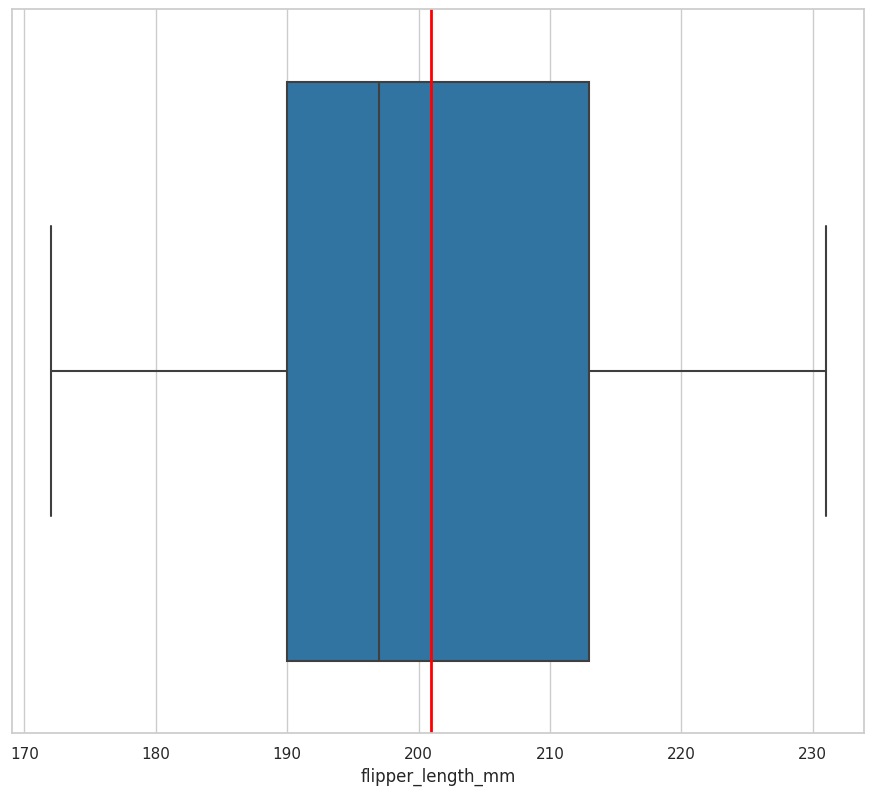

In [20]:
sns.boxplot(data = df, x='flipper_length_mm')
plt.axvline(
    x = df.flipper_length_mm.mean(),
    color = 'red',
    linewidth = 2)

# Distribuciones: PMFs, CDFs y PDFs

## Funciones de probabilidad de masas (PMFs)

### Utilizando `seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Probability'>

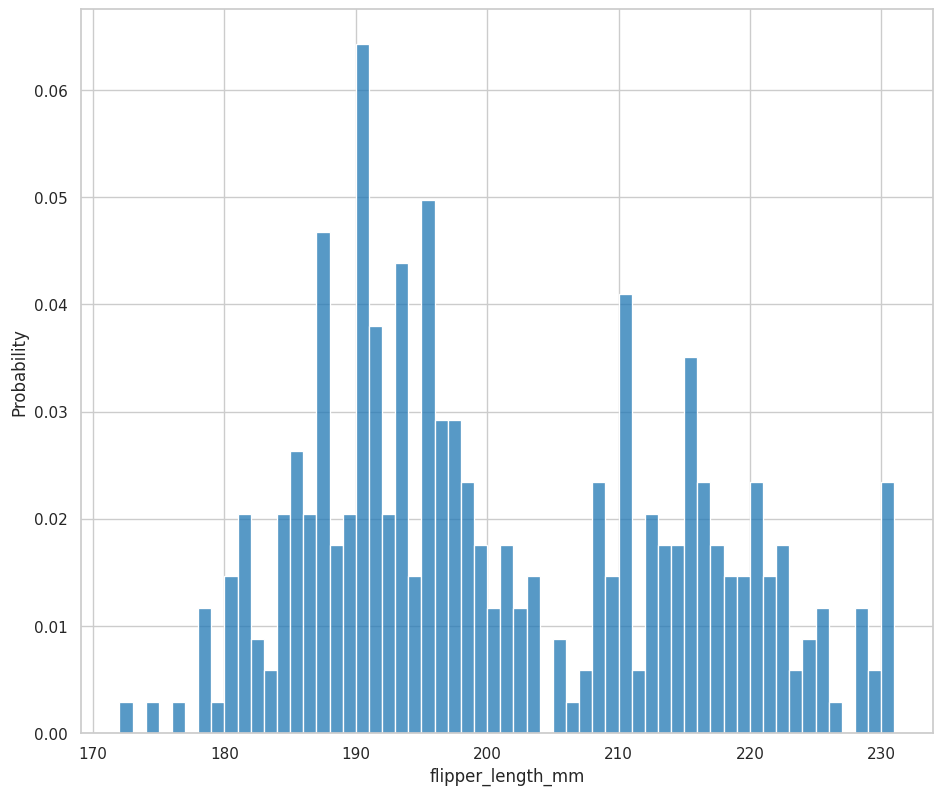

In [27]:
sns.histplot(
    data = df,
    x = 'flipper_length_mm',
    binwidth = 1,
    stat = 'probability'
)

### Utilizando `empiricaldist`

In [31]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    df.flipper_length_mm,
    normalize = True
)

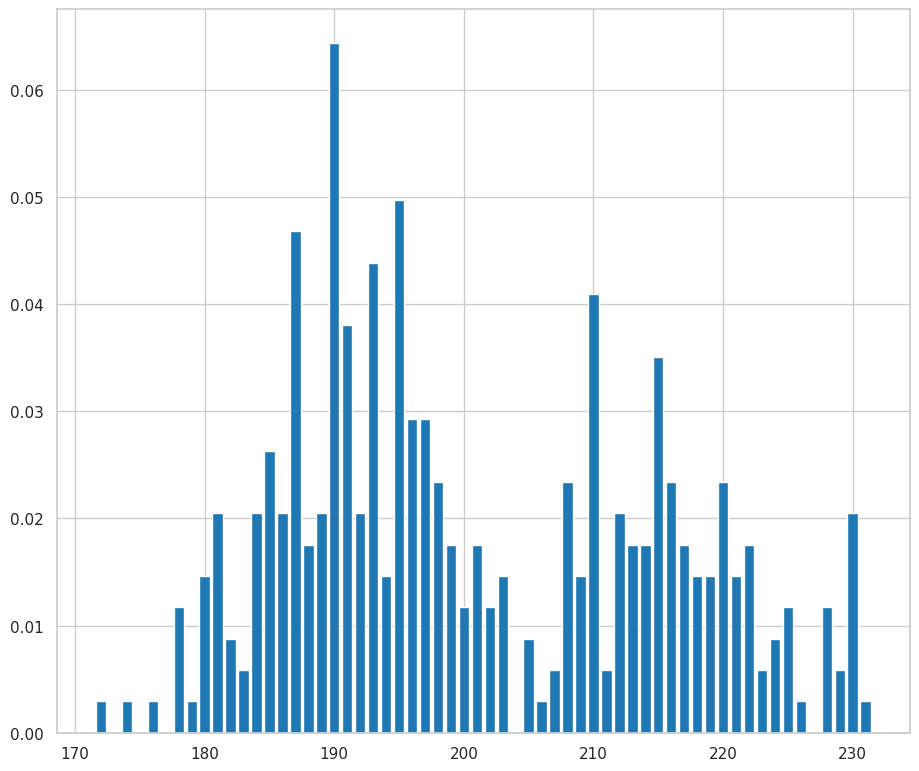

In [32]:
pmf_flipper_length_mm.bar()

In [ ]:
#Probabilidad de que exista un pinguino con esas caracteristicas
pmf_flipper_length_mm(180)

In [33]:
#Maximo
pmf_flipper_length_mm.max()

0.06432748538011696

## Funciones empirícas de probabilidad acumulada (ECDFs)

### Utilizando `seaborn`

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Proportion'>

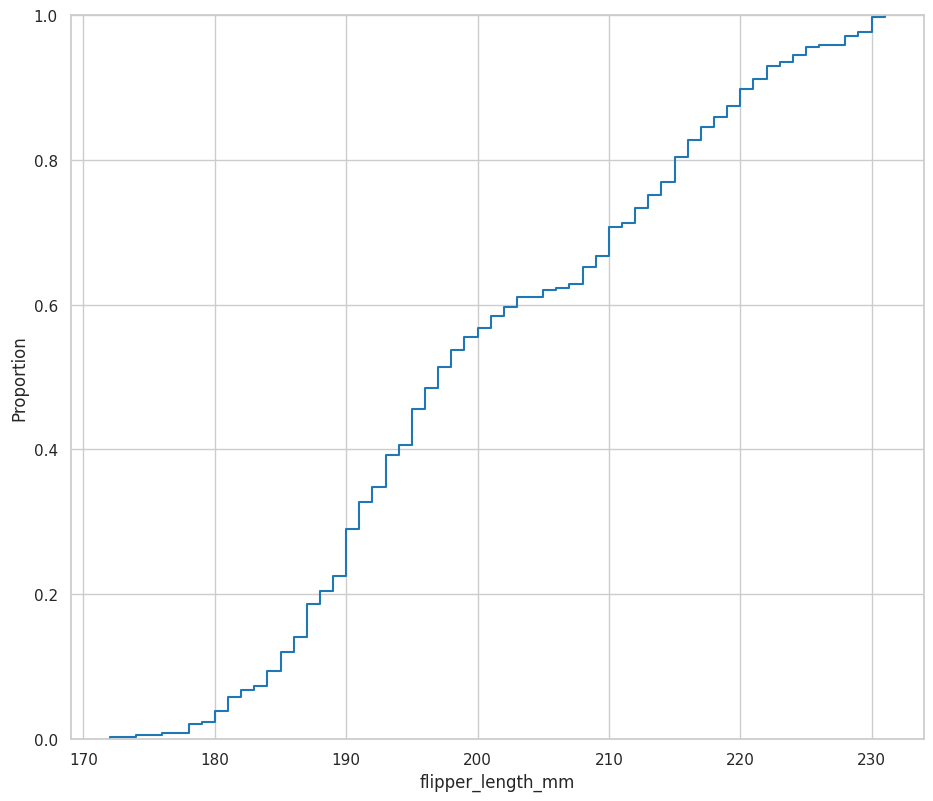

In [35]:
sns.ecdfplot(
    data = df,
    x = 'flipper_length_mm'
)

### Utilizando `empiricaldist`

In [38]:
cdf_flipper_length_mm = empiricaldist.Cdf.from_seq(
    df['flipper_length_mm'],
    normalize = True
)

In [40]:
q = 290
p = cdf_flipper_length_mm.forward(q)

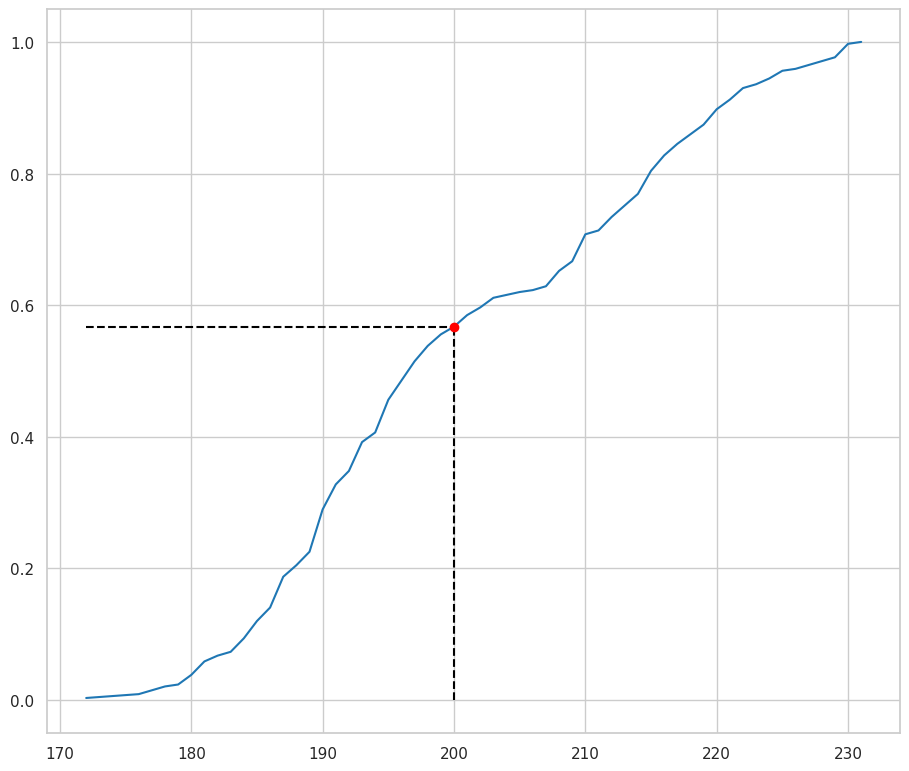

In [41]:
cdf_flipper_length_mm.plot()

q = 200
p = cdf_flipper_length_mm.forward(q)

plt.vlines(
    x=q,
    ymin=0,
    ymax=p,
    color='black',
    linestyle='dashed'
)

plt.hlines(
    y=p,
    xmin=pmf_flipper_length_mm.qs[0],
    xmax=q,
    color='black',
    linestyle='dashed'
)

plt.plot(q,p, 'ro')

### Comparando distribuciones

In [ ]:
cdf_flipper_length_mm.step ( )
p_1 = 8.25 # Specify probability
P_2 = 8.75
ps = ( 0.25 , 0.75 ) # IQR
qs = cdf_flipper_length_mm.inverse(ps)
plt.vlines (
    x = qs,
    ymin = 0,
    ymax=ps,
    color='black',
    linestyle='dashed'
)

plt.hlines(
   y=ps,
   xmin=pmf_flipper_length_mm.qs[0],
   xmax=qs,
   color='black',
   linestyle='dashed'
)

plt.scatter(
   x=qs,
   y=ps,
   color='red',
   zorder=2
)


## Funciones de densidad de probabilidad

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Density'>

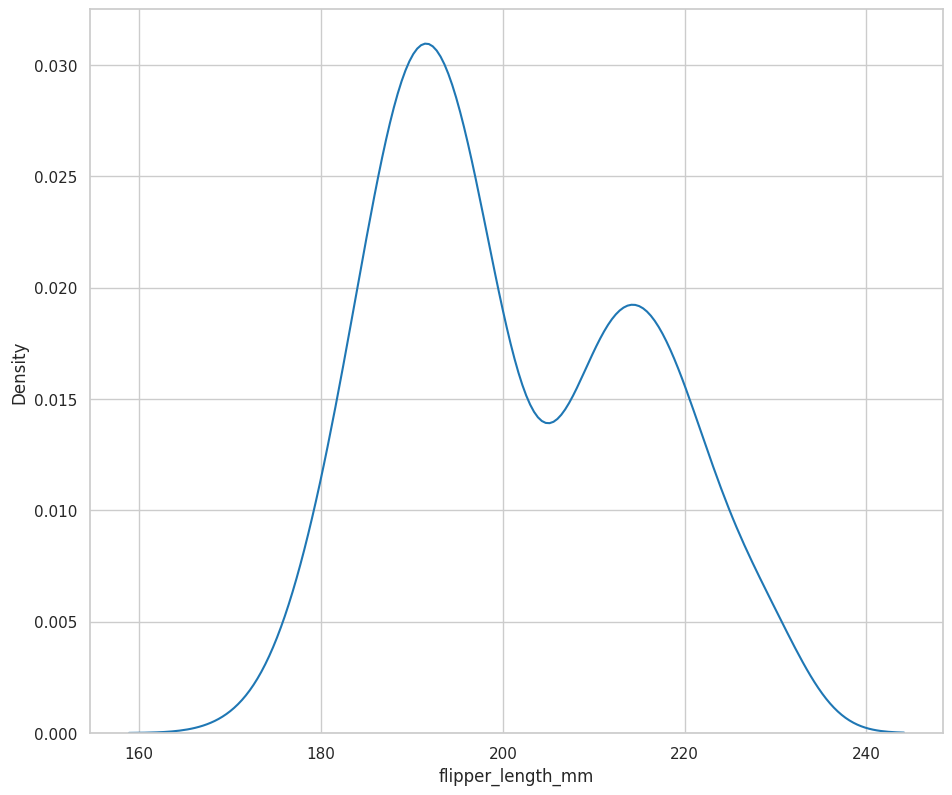

In [42]:
sns.kdeplot(
    data = df,
    x = 'flipper_length_mm'
)

<AxesSubplot: >

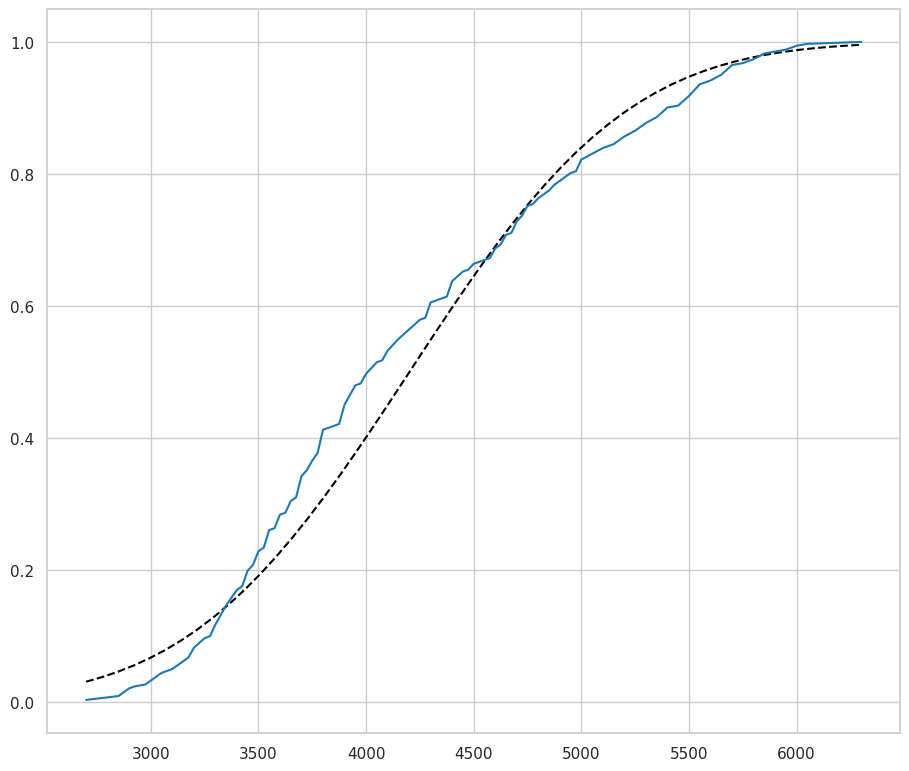

In [50]:
stats = df.body_mass_g.describe()
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
plt.plot(xs, ys, color = 'black', linestyle = 'dashed')
empiricaldist.Cdf.from_seq(
    df.body_mass_g,
    normalize = True
).plot()

In [ ]:
stats = df.body_mass_g.describe()
xs = np.linspace(stats['min'], stats['max'])
ys = scipy.stats.norm(stats['mean'], stats['std']).cdf(xs)
plt.plot(xs, ys, color = 'black', linestyle = 'dashed')
empiricaldist.Cdf.from_seq(
    df.body_mass_g,
    normalize = True
).plot()

# Ley de los Grandes Números y Teorema del Límite Central

## Ley de los Grandes Números

In [52]:
dice = empiricaldist.Pmf.from_seq([1, 2, 3, 4, 5, 6])

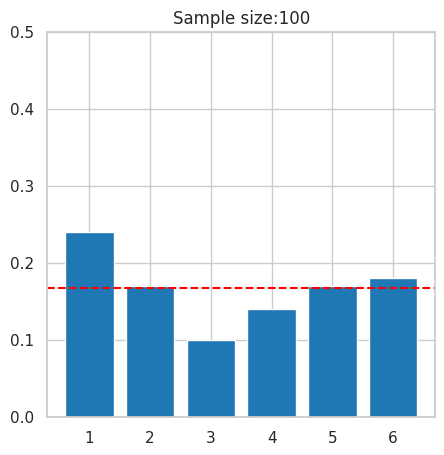

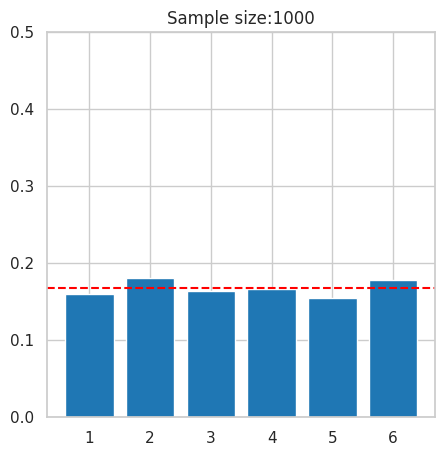

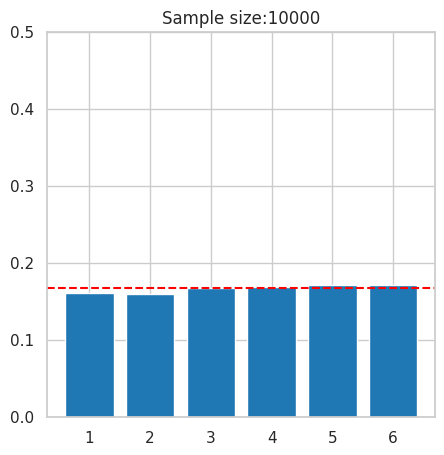

In [56]:
for sample_size in (1e2, 1e3, 1e4):
    sample_size = int(sample_size)
    values = dice.sample(sample_size)
    sample_pmf = empiricaldist.Pmf.from_seq(values)
    
    plt.figure(figsize = (5, 5))
    sample_pmf.bar()
    plt.axhline(y=1/6, color ='red', linestyle='dashed')
    plt.ylim([0, 0.50])
    plt.title(f'Sample size:{sample_size}')

## Teorema del Límite Central

In [59]:
df.sex.value_counts(normalize=True)


male      0.504505
female    0.495495
Name: sex, dtype: float64

In [61]:
sex_numeric = df.sex.replace(['male', 'female'], [1,0])


In [ ]:
number_samples = 1000
sample_size = 35

samples_df = pd.DataFrame()

np.random.seed(42)
for i in range(1, number_samples + 1):
    sex_numeric_sample = sex_numeric.sample(sample_size, replace=True).to_numpy()
    sample_name = f"sample_{i}"
    samples_df[sample_name] = sex_numeric_sample


male_population_mean = samples_df.mean().mean()
print(f"Estimated percentage of male penguins in population is: {male_population_mean * 100:.4f}%")

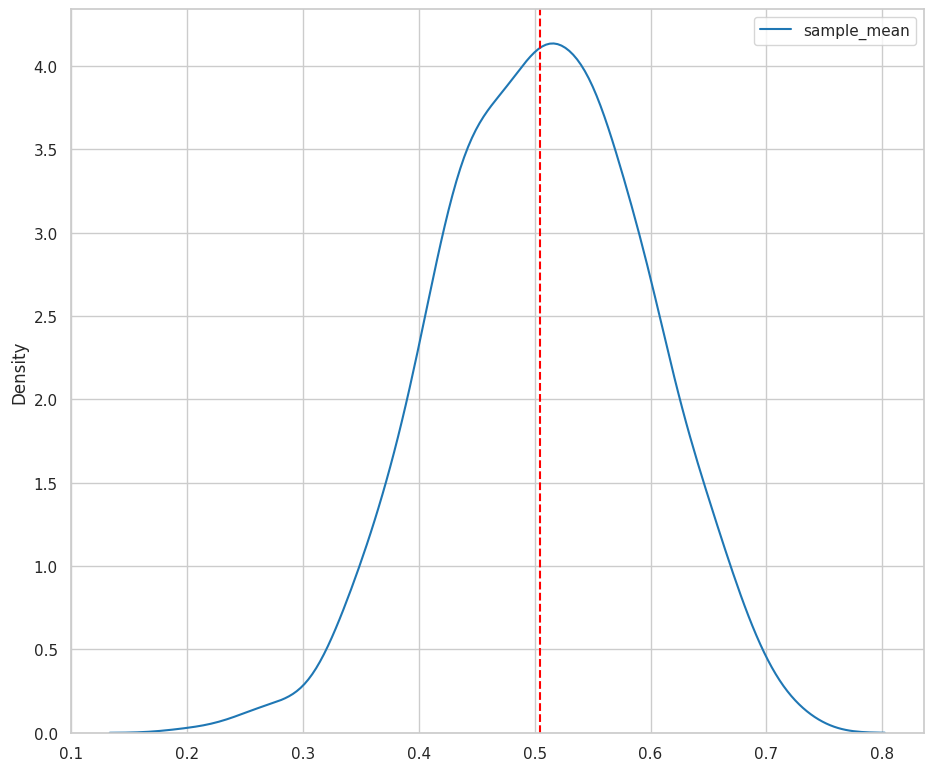

In [63]:
sample_means_binomial = pd.DataFrame(samples_df.mean(), columns=['sample_mean'])
sns.kdeplot(data=sample_means_binomial)
plt.axvline(x=sex_numeric.mean(), color='red', linestyle='dashed')

In [64]:
sample_size_experiment = pd.DataFrame(
    [[i, samples_df.iloc[:, 0:i].mean().mean().mean()] for i in range(1, number_samples + 1)],
    columns=['sample_size', 'estimated_mean']
)


(0.30450450450450445, 0.7045045045045044)

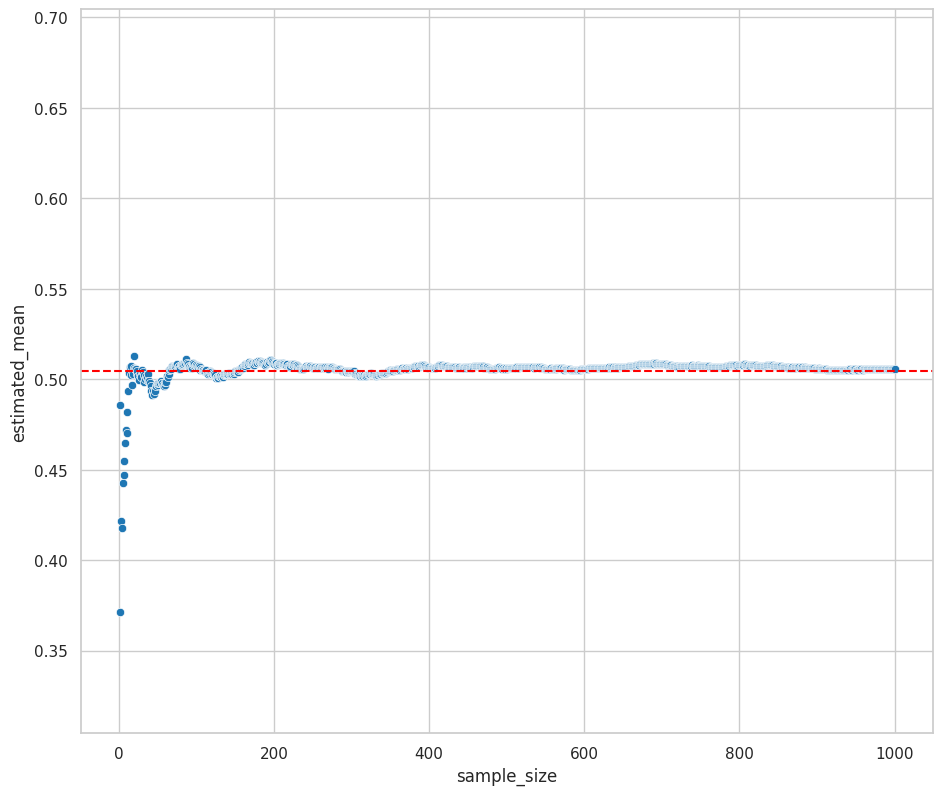

In [67]:
sns.scatterplot(
    data=sample_size_experiment,
    x='sample_size',
    y='estimated_mean'
)

plt.axhline(
    y=sex_numeric.mean(),
    color='red',
    linestyle='dashed'
)

plt.ylim(
    [sex_numeric.mean() - 0.20, sex_numeric.mean() + 0.20])

# Estableciendo relaciones: Gráfica de puntos

In [69]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex', 'year'],
      dtype='object')

<AxesSubplot: xlabel='flipper_length_mm', ylabel='bill_length_mm'>

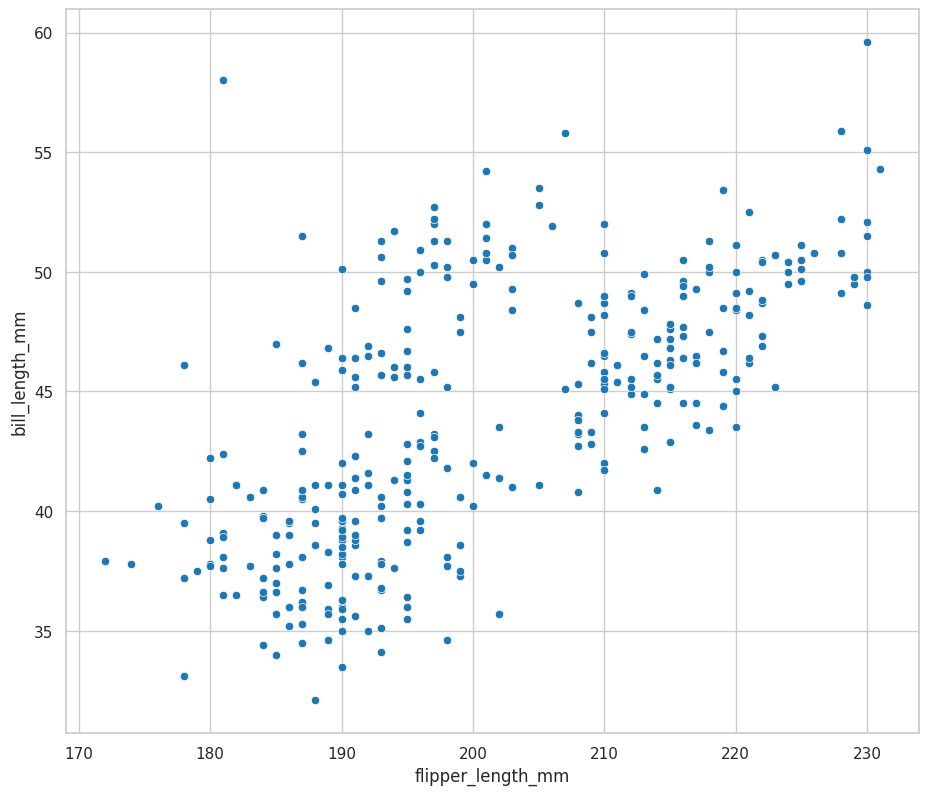

In [70]:
sns.scatterplot(
    data= df,
    x='flipper_length_mm',
    y= 'bill_length_mm'
)

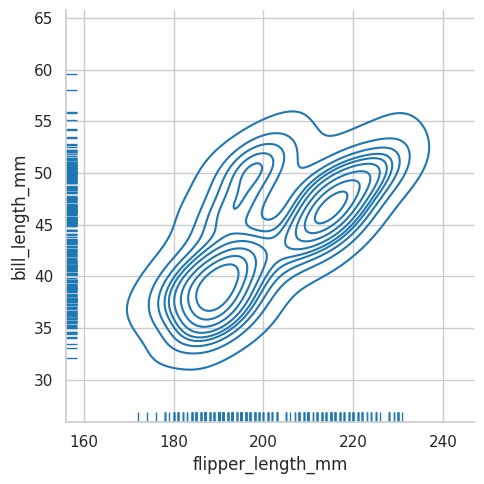

In [72]:
sns.displot(
    data= df,
    x='flipper_length_mm',
    y= 'bill_length_mm',
    rug = True,
    kind = 'kde'
)

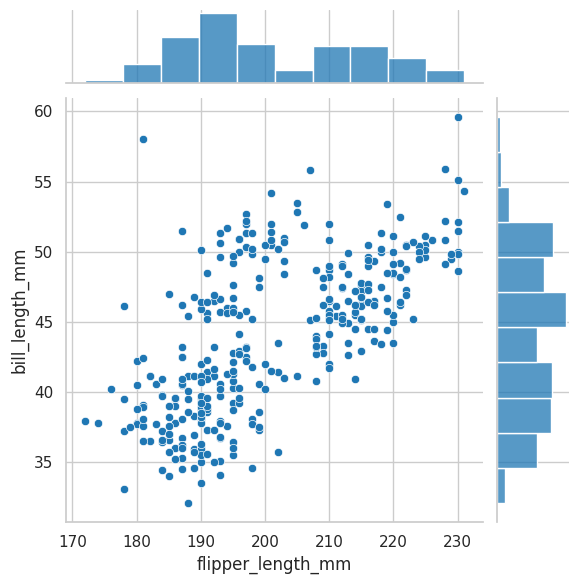

In [75]:
sns.jointplot(
    data= df,
    x='flipper_length_mm',
    y= 'bill_length_mm',
)

# Estableciendo relaciones: Gráficos de violín y boxplots

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

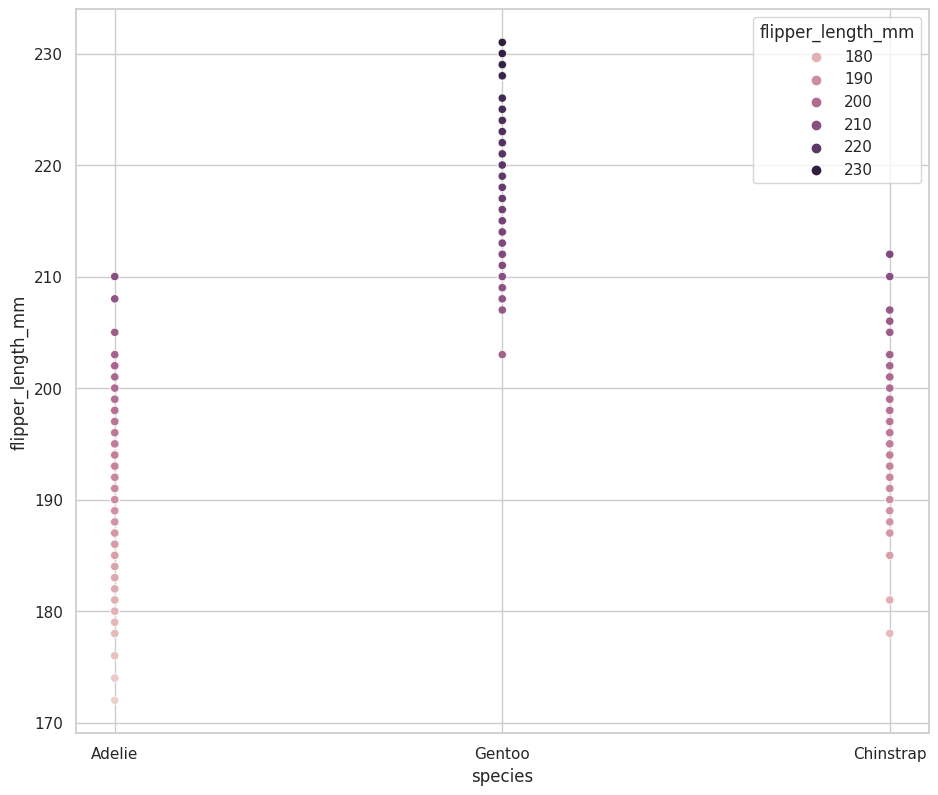

In [76]:
sns.scatterplot(
    data=df,
    x='species',
    y='flipper_length_mm',
    hue='flipper_length_mm', #agrega un calor distinto por categoria
)

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

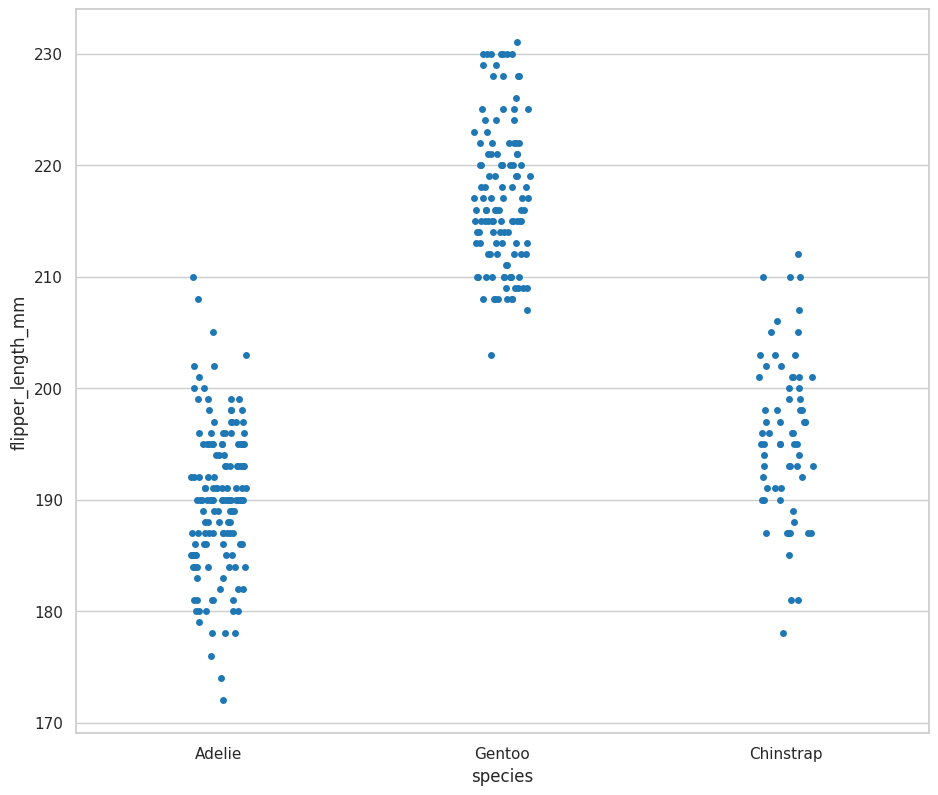

In [79]:
sns.stripplot(
    data=df,
    x='species',
    y='flipper_length_mm',
)

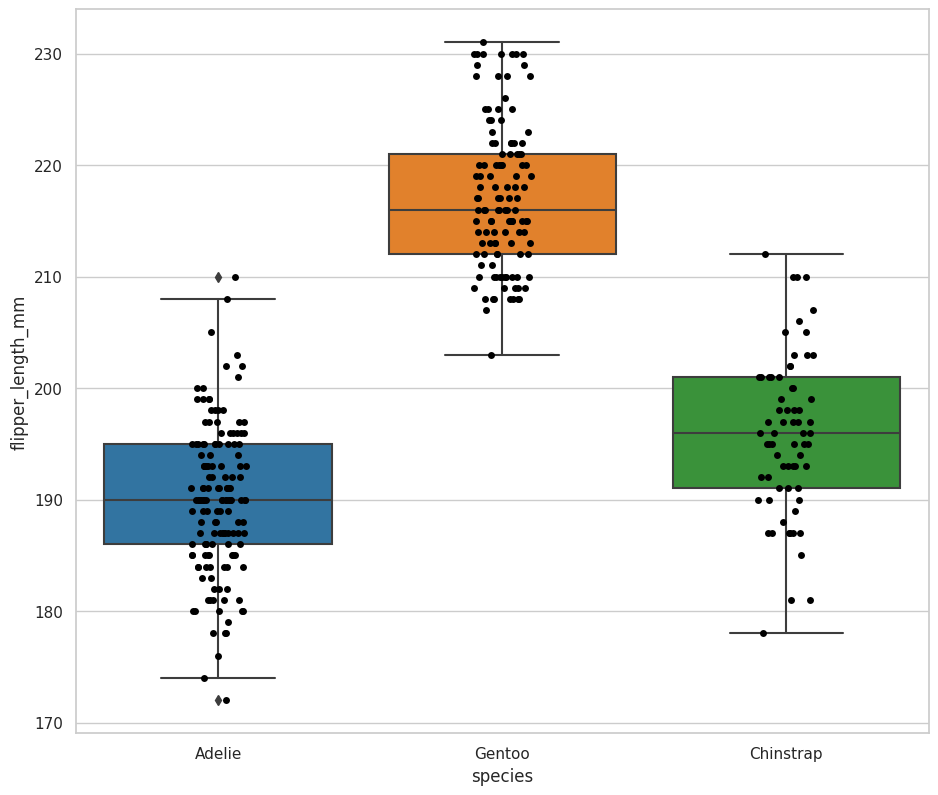

In [80]:
ax = sns.boxplot(
    data=df,
    x='species',
    y='flipper_length_mm',
)

#grafico de puntos
ax = sns.stripplot(
    data=df,
    x='species',
    y='flipper_length_mm',
    color = 'black'    
)

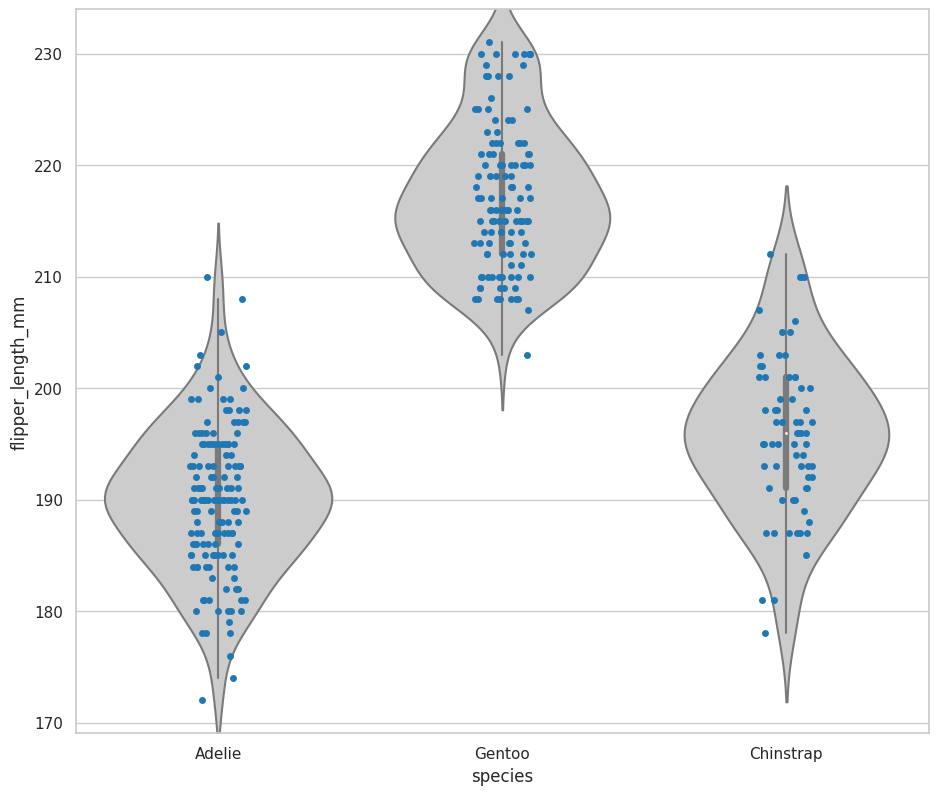

In [85]:
ax = sns.violinplot(
    data=df,
    x='species',
    y='flipper_length_mm',
    color='.8'
)

#Grafico de puntos
ax = sns.stripplot(
    data=df,
    x='species',
    y='flipper_length_mm',    
);

<AxesSubplot: xlabel='species', ylabel='flipper_length_mm'>

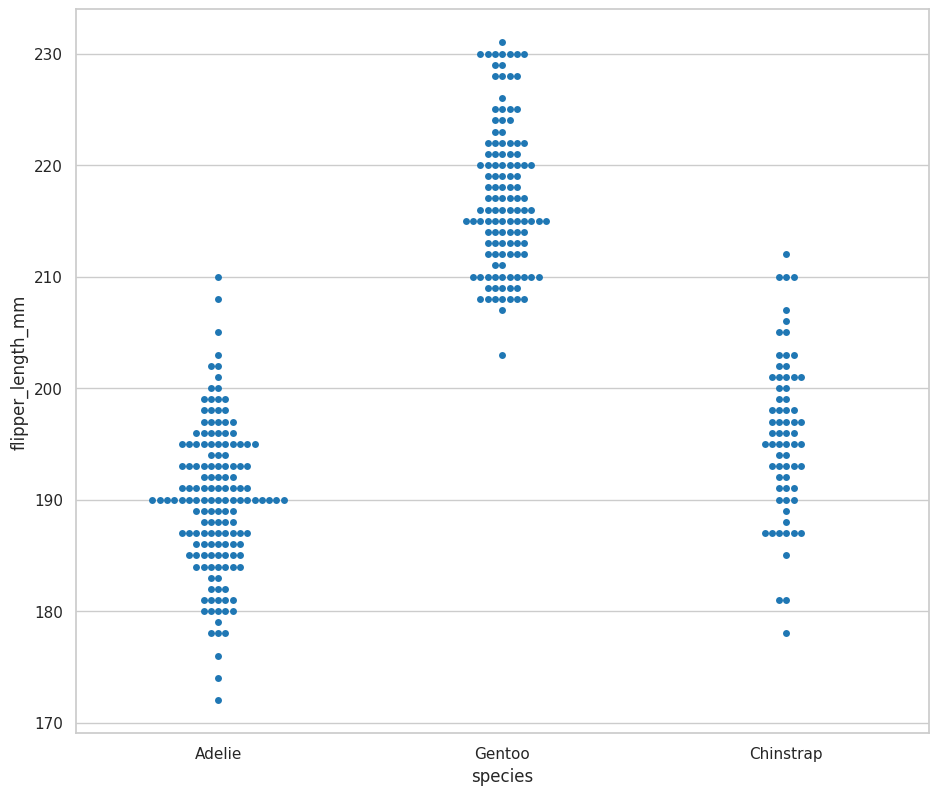

In [86]:
sns.swarmplot(
    data=df,
    x='species',
    y='flipper_length_mm',
)

# Estableciendo relaciones: Matrices de correlación

## ¿Existe una correlación lineal entre alguna de nuestras variables?

In [87]:
df.corr()

/tmp/ipykernel_6951/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.235053,0.656181,0.595110,0.054545
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916,-0.060354
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202,0.169675
body_mass_g,0.595110,-0.471916,0.871202,1.000000,0.042209
year,0.054545,-0.060354,0.169675,0.042209,1.000000


## ¿Cómo puedo visualizar los coeficientes de correlación?

/tmp/ipykernel_6951/765115317.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.corr(),


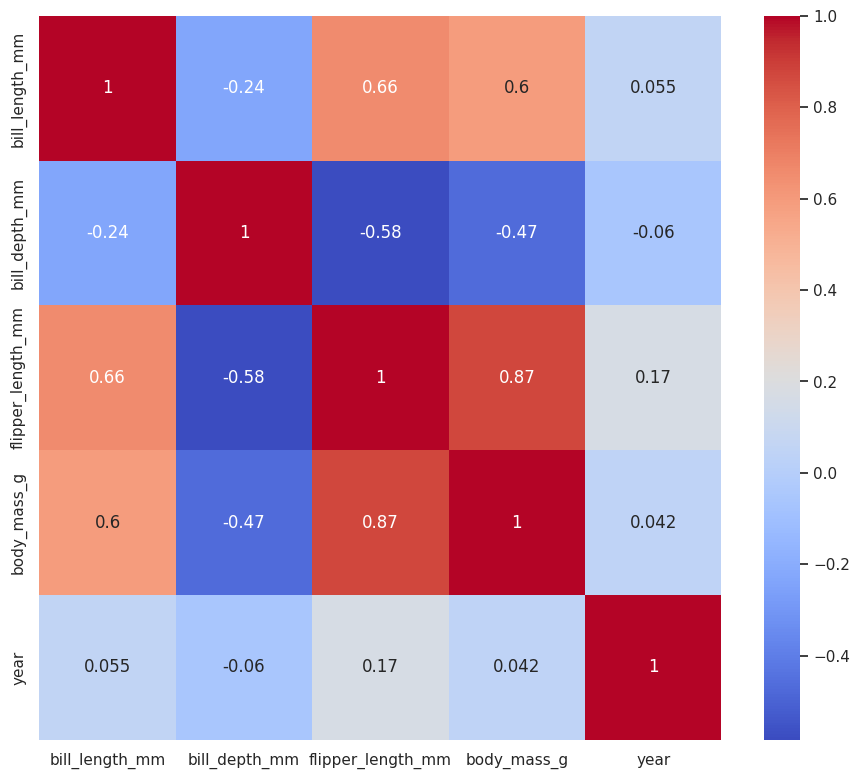

In [95]:
sns.heatmap(
    data = df.corr(), 
    annot= True,
    cmap='coolwarm');

/tmp/ipykernel_6951/3467349355.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data = df.corr(),


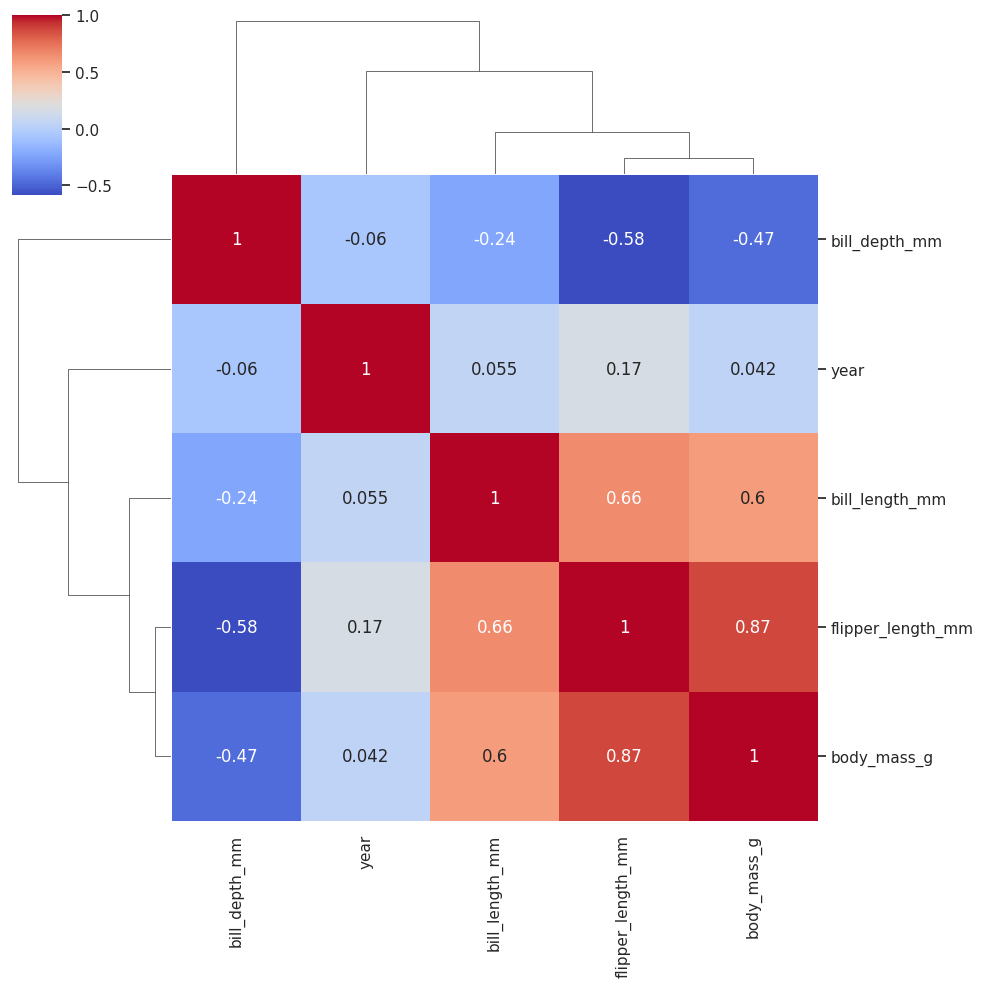

In [96]:
sns.clustermap(
    data = df.corr(), 
    annot= True,
    cmap='coolwarm');

## ¿Cómo podría representar una variable categórica como númerica discreta?

In [ ]:
sns.scatterplot(x=x1, y=y1)

fx1 = np.array([x1.min(), x1.max()])
fy1 = r1.intercept + r1.slope * fx1

plt.plot(fx1, fy1)


sns.scatterplot(x=x2, y=y2)

fx2 = np.array([x2.min(), x2.max()])
fy2 = r2.intercept + r2.slope * fx2

plt.plot(fx2, fy2)

plt.legend(["1", "1","2","2"])

## ¿Cuál es una limitante de los coeficientes de correlación lineal?

### Solo nos ayuda a determinar la posible existencia de una correlación lineal; sin embargo, su ausenecia no significa que no exista otro tipo de correlación

<AxesSubplot: >

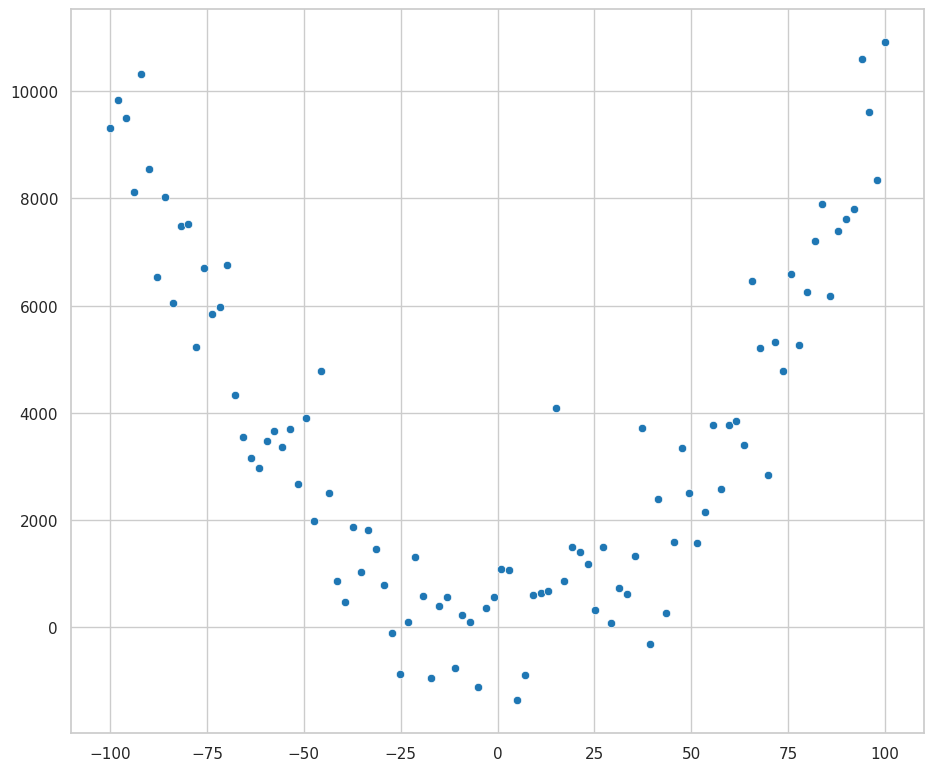

In [101]:
x = np.linspace(-100, 100, 100)
y = x**2
y += np.random.normal(0,1000, x.size)

sns.scatterplot(
    x = x, y = y
)

array([[1.        , 0.91668347],
       [0.91668347, 1.        ]])

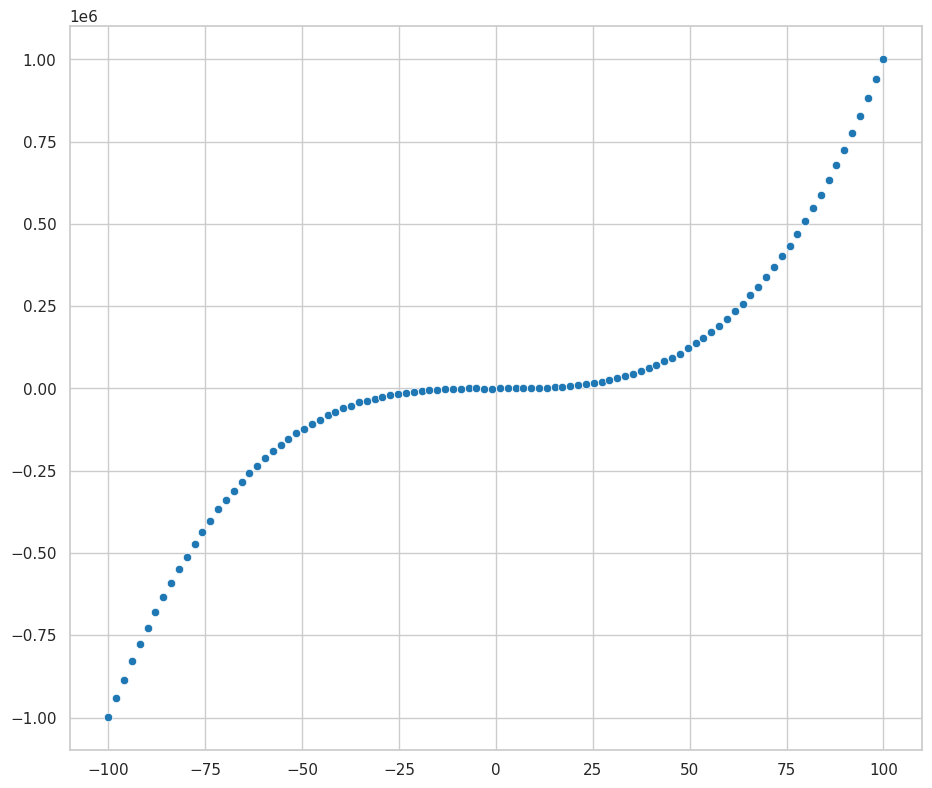

In [105]:
x = np.linspace(-100, 100, 100)
y = x**3 + np.random.normal(0, 1000, x.size)

sns.scatterplot(
    x = x,
    y = y
)
np.corrcoef(x, y)

### El coeficiente de correlación no nos habla del impacto de la relación

[[1.         0.92761617]
 [0.92761617 1.        ]]
[[1.         0.67476343]
 [0.67476343 1.        ]]


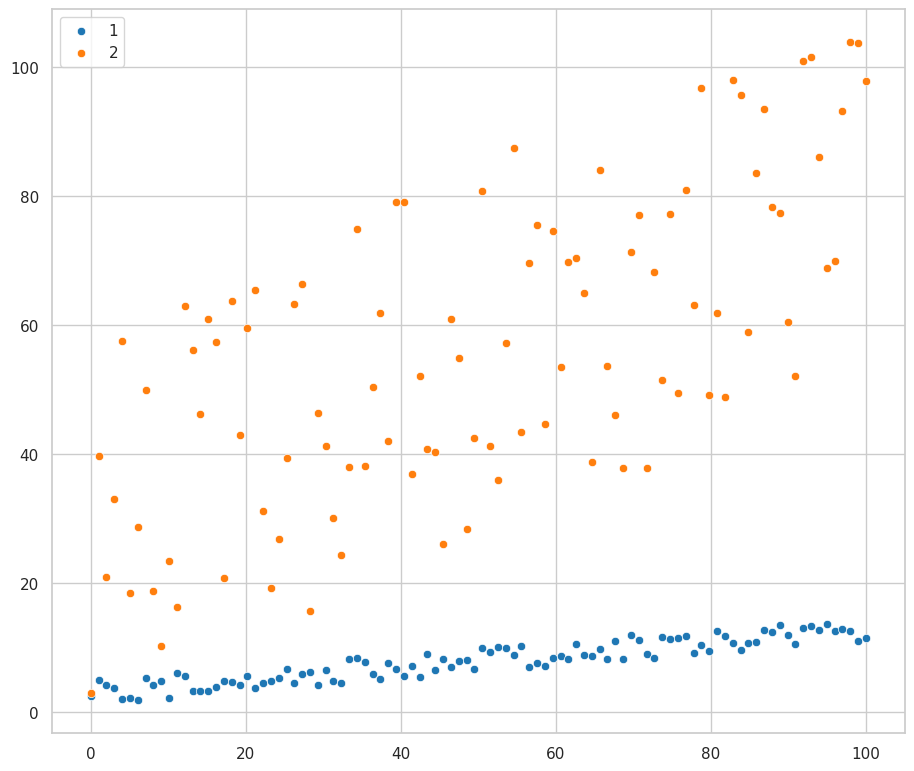

In [106]:
np.random.seed(42)
x1 = np.linspace(0,100,100)
y1 = 0.1* x1 +3 + np.random.uniform(-2,2,size=x1.size)

sns.scatterplot(x=x1, y=y1)


x2 = np.linspace(0,100,100)
y2 = 0.5* x1 +1 + np.random.uniform(0,60,size=x2.size)

sns.scatterplot(x=x2, y=y2)

plt.legend(["1","2"])

print(np.corrcoef(x1,y1))
print(np.corrcoef(x2,y2))

# Estableciendo relaciones: Análisis de regresión simple

In [109]:
x = df.flipper_length_mm
y = df.body_mass_g

res_1 = scipy.stats.linregress(x = x_1, y=y_1)
res_2 = scipy.stats.linregress(x = x_2, y=y_2)

print(res_1, res_2, sep = '\n')

NameError: name 'x_1' is not defined

In [ ]:
sns.scatterplot(x=x1, y=y1)

fx1 = np.array([x1.min(), x1.max()])
fy1 = r1.intercept + r1.slope * fx1

plt.plot(fx1, fy1)


sns.scatterplot(x=x2, y=y2)

fx2 = np.array([x2.min(), x2.max()])
fy2 = r2.intercept + r2.slope * fx2

plt.plot(fx2, fy2)

plt.legend(["1", "1","2","2"])

In [ ]:
sns.scatterplot(preprocessed, x="bill_length_mm", y="bill_depth_mm")

res_penguins = scipy.stats.linregress(x=preprocessed.bill_length_mm, y=preprocessed.bill_depth_mm)

print(res_penguins)

fx1 = np.array([preprocessed.bill_length_mm.min(), preprocessed.bill_length_mm.max()])
fy1 = res_penguins.intercept + res_penguins.slope * fx1

plt.plot(fx1,fy1) 

# Limitaciones del análisis de regresión simple

## La regresión lineal simple no es simétrica

In [8]:
x = df.bill_depth_mm
y = df.bill_length_mm

res_x_y = scipy.stats.linregress(x=x, y=y)
res_y_x = scipy.stats.linregress(x=y, y=x)

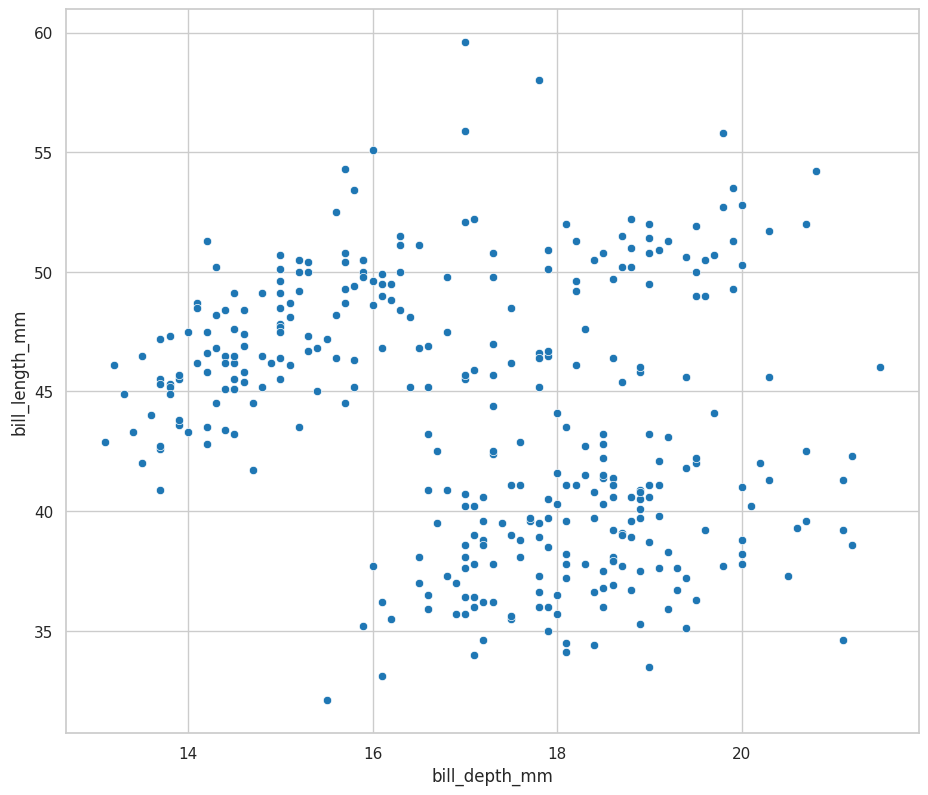

In [11]:
#Fig. 1
sns.scatterplot(
    x=x,
    y=y
)

fx_1= np.array([x.min(), x.max()])
fy_1= res_x_y.intercept + res_x_y.slope * fx_1

plt.plot(fx_1, fy_1);

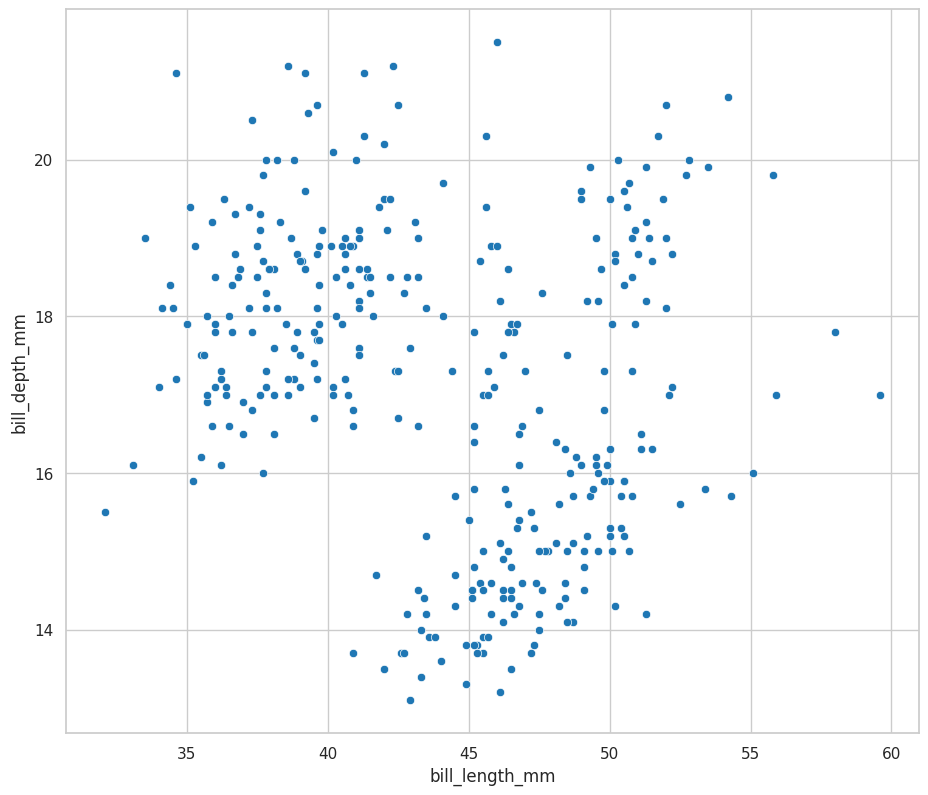

In [115]:
#Fig. 2
sns.scatterplot(
    x=y,
    y=x
)

fx_2= np.array([y.min(), y.max()])
fy_2= res_y_x.intercept + res_y_x.slope * fx_2

plt.plot(fx_2, fy_2)

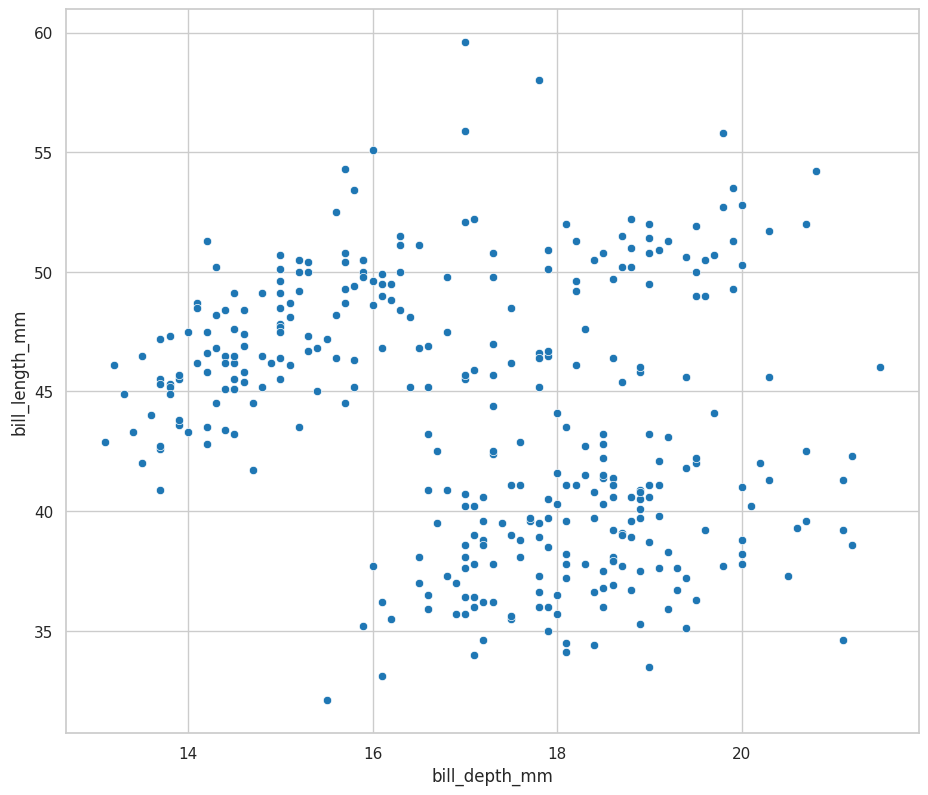

In [116]:
# Fig. 3
sns.scatterplot(
    x=x,
    y=y
)
plt.plot(fx_1, fy_1)
plt.plot(fy_2, fx_2)

## La regresión no nos dice nada sobre la causalidad, pero existen herramientas para separar las relaciones entre múltiples variables

In [12]:
(
    smf.ols(
        formula='bill_length_mm ~ bill_depth_mm ',
        data=df
    )
    .fit()
    .params
)

Intercept        55.067370
bill_depth_mm    -0.649836
dtype: float64

In [13]:
(
    smf.ols(
        formula='bill_depth_mm ~ bill_length_mm',
        data=df
    )
    .fit()
    .params
)

Intercept         20.885468
bill_length_mm    -0.085021
dtype: float64

# Análisis de regresión múltiple

## Olvidé mi báscula para pesar a los pingüinos, ¿cuál sería la mejor forma de capturar ese dato?

### Creando modelos

#### Modelo 1

#### Modelo 2

#### Modelo 3

#### Modelo 4

#### Modelo 5

### Visualizando resultados

#### Creación de tabla de resultados

#### ECDFs

#### PDFs

#### ¿Qué pudimos haber encontrado antes de hacer los modelos?

# Análisis de regresión logística

## ¿Podemos crear un modelo que nos ayude a definir si un pingüino es macho o hembra?

## Exploración de nuestras variables categóricas

## ¿Podemos definir un modelo que nos ayude a identificar si un pingüino pertenece a determinada clase?

# Paradoja de Simpson

## Información de sesión

In [2]:
session_info.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=fb8b09fe-58e5-4e41-98af-4532009b73b8' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>